# FEATURE ENGINEERING

1. Handle Missing values

2. Treating Outliers

3. Handle Categorical data

# Methods To Handle Missing values for numerical and categorical data.



Firstly segregate the dataset into numerical and categorical

1.  For Numerical Data



1.a) Missing Completely at Random, MCAR:( Drop NAN values)

variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\eshan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df_ob=df.select_dtypes(include="object")

In [7]:
df_ob

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [8]:
df_ob1=df_ob.drop(["Name","Ticket","Cabin"],axis=1)

In [9]:
df_num=df.drop(df_ob,axis=1)
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [11]:
df_num=df_num.drop("PassengerId",axis=1)

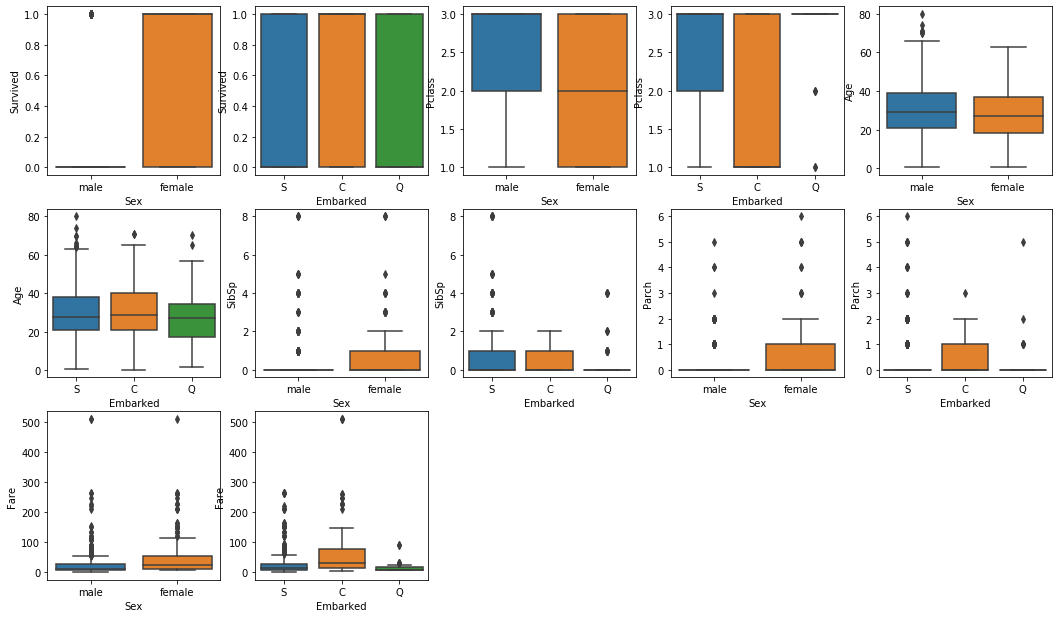

In [12]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in df_num:
    for j in df_ob1: 
        if plotnumber<=25:
            ax=plt.subplot(5,5,plotnumber)
            sns.boxplot(y=df_num[i],x=df_ob1[j])
            plt.xlabel(j)
            plt.ylabel(i)
            plotnumber+=1
plt.show()

In [13]:
df["new"]=df["Survived"]

In [14]:
df.loc[df["Survived"]==0,"new"]="died"
df.loc[df["Survived"]==1,"new"]="Survived"

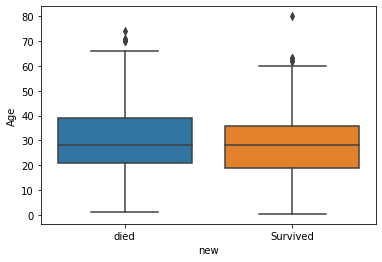

In [15]:
sns.boxplot(y=df["Age"],x=df["new"])

#### Missing At Random(MAR)

All the techniques to handle missing values

1. Mean/ Median/Mode replacement or skewness factor
2. Variance method replacement
3. iterative imputer
4. KNN imputer
5. Interpolation merely for time series


# 1) Mean/ Median Imputation Or Skewness factor


In [17]:
df1_num1=df_num.drop(["Survived"],axis=1)
df1_num1.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [18]:
df2_num=df1_num1.copy()
df2_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [20]:
def skewness():
    sk=[]
    for i in df2_num:
        sk1= (df2_num[i].mean() - df2_num[i].mode())/df2_num[i].std()
        sk.append(sk1)
    return(sk)
SK=skewness()

SK


[0   -0.826913
 dtype: float64,
 0    0.392326
 dtype: float64,
 0    0.474279
 dtype: float64,
 0    0.473408
 dtype: float64,
 0    0.486064
 dtype: float64]

In [21]:
SK1=pd.DataFrame(SK)
SK1
SK1.columns=["skewness"]
SK1["skewness"]

0   -0.826913
1    0.392326
2    0.474279
3    0.473408
4    0.486064
Name: skewness, dtype: float64

In [22]:

j=0
for i in df2_num.columns:
    if j<=len(SK1)-1:
        if SK1["skewness"][j]>.5:
            df2_num[i]=df2_num[i].fillna(df2_num[i].median())
        elif SK1["skewness"][j]<-0.5:
            df2_num[i]=df2_num[i].fillna(df2_num[i].median())
        else:
            df2_num[i]=df2_num[i].fillna(df2_num[i].mean())
        j+=1


In [23]:
df2_num.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [24]:
print(df2_num['Age'].std())
print(df['Age'].std())

13.002015226002884
14.526497332334044


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

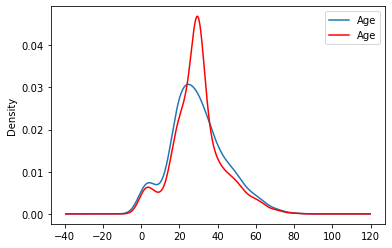

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df2_num.Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 2) VARIANCE METHOD REPLACEMENT

In [27]:
df_v=df1_num1.copy()
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [28]:
df_ob.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [29]:
df_ob=df[["Pclass","Sex","Embarked"]]

In [31]:
a=df_v.isnull().sum()>0
a      
b=pd.DataFrame(a)
b
b.reset_index(level=0,inplace=True)
b.columns=["att","bool"]
b
c=b.loc[b["bool"]==True,"att"]
c

1    Age
Name: att, dtype: object

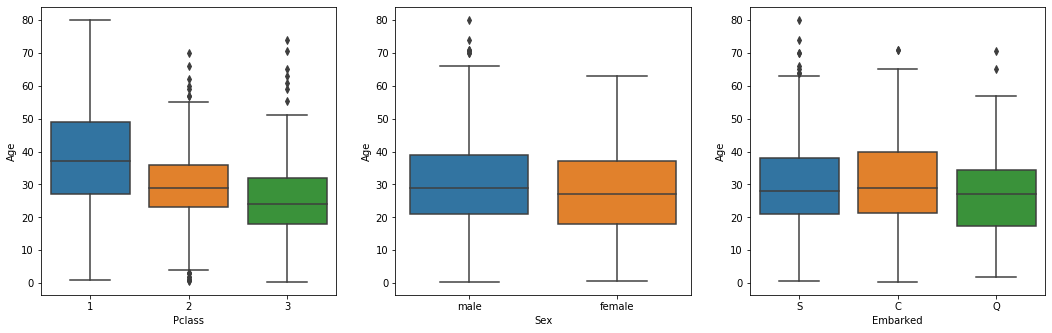

In [32]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in c:
    for j in df_ob: 
        if plotnumber<=9:
            ax=plt.subplot(3,3,plotnumber)
            sns.boxplot(y=df_v[i],x=df_ob[j])
            plt.xlabel(j)
            plt.ylabel(i)
            plotnumber+=1
plt.show()        

In [33]:
for i in c:
    for j in df_ob:
        a=df_v.groupby(df_ob[j])[i].mean()
        print(a)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64


In [34]:
df_v["Age"]=df_v.groupby(df_ob["Pclass"])["Age"].apply(lambda x : x.fillna(x.mean()))


In [35]:
df_v.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [36]:
print(df["Age"].std())
print(df_v["Age"].std())

14.526497332334044
13.210527334401556


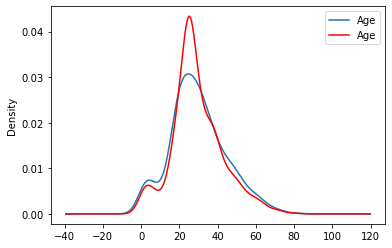

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df_v.Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 3) ITERATIVE IMPUTER

In [40]:
df_iim=df1_num1.copy()

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
num_impute= IterativeImputer()

In [43]:
df_iim_f=num_impute.fit_transform(df_iim)

In [44]:
df_iim_f

array([[ 3.        , 22.        ,  1.        ,  0.        ,  7.25      ],
       [ 1.        , 38.        ,  1.        ,  0.        , 71.2833    ],
       [ 3.        , 26.        ,  0.        ,  0.        ,  7.925     ],
       ...,
       [ 3.        , 21.13265306,  1.        ,  2.        , 23.45      ],
       [ 1.        , 26.        ,  0.        ,  0.        , 30.        ],
       [ 3.        , 32.        ,  0.        ,  0.        ,  7.75      ]])

In [45]:
df_iim_f=pd.DataFrame(df_iim_f,columns=df_v.columns)


In [47]:
df_iim_f.head(10)

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,38.000000,1.0,0.0,71.2833
2,3.0,26.000000,0.0,0.0,7.9250
3,1.0,35.000000,1.0,0.0,53.1000
4,3.0,35.000000,0.0,0.0,8.0500
5,3.0,27.617131,0.0,0.0,8.4583
6,1.0,54.000000,0.0,0.0,51.8625
7,3.0,2.000000,3.0,1.0,21.0750
8,3.0,27.000000,0.0,2.0,11.1333
9,2.0,14.000000,1.0,0.0,30.0708


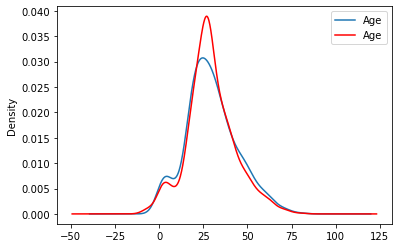

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df_iim_f.Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 4) KNN IMPUTER

In [49]:
from sklearn.impute import KNNImputer

In [53]:
df_kni=df1_num1.copy()

In [64]:
k_impute=KNNImputer(n_neighbors=6)

In [65]:
df_kni_f=k_impute.fit_transform(df_kni)

In [66]:
df_kni_f=pd.DataFrame(df_kni_f,columns=df1_num1.columns)

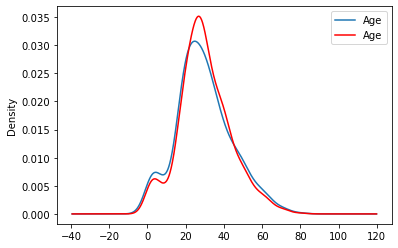

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df_kni_f.Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Handle Missing Values in Categorical Data

 Rule:- first strive to find out the features who have less than 20% missing values.

1- Fill the missing values by mode method

2- Fill the missing values by creating new category

# 1- Mode Method

In [68]:
df=pd.read_csv("HOUSE PRICE DATA.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
df_ob=df.select_dtypes(include="object")

In [71]:
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [72]:
df_ob.isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [77]:
q=(df_ob.isnull().mean()>.2) & (df_ob.isnull().mean()<1)
q

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [73]:
a=(df_ob.isnull().mean()>0) & (df_ob.isnull().mean()<.2)
a

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [74]:
b=pd.DataFrame(a)
b.reset_index(inplace=True)
b.columns=["features","bool"]

In [76]:
c=b.loc[b["bool"]==True,"features"]
c

17      MasVnrType
21        BsmtQual
22        BsmtCond
23    BsmtExposure
24    BsmtFinType1
25    BsmtFinType2
29      Electrical
33      GarageType
34    GarageFinish
35      GarageQual
36      GarageCond
Name: features, dtype: object

In [90]:
df_ob1=df[c]
df_ob.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [190]:
df_ob1.isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [80]:
for i in df_ob1:
    df_ob1[i]=df_ob1[i].fillna(df_ob1[i].mode()[0]) 

C:\Users\eshan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
df_ob1.isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

# 2-Fill the missing values by creating new category

In [84]:
df2=df_ob[c]


In [85]:
df2.isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [86]:
for i in df2:
    df2[i]=np.where(df[i].isnull(),"missing",df[i])

C:\Users\eshan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
df2['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'missing'], dtype=object)